<a href="https://colab.research.google.com/github/hiyeontae/SkillTreePython-DeepLearning/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜:
* 이름:

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [2]:
x=np.array([3,5,5,7,8])
y=np.array([20,50,60,90,100])
x.shape, y.shape

((5,), (5,))

* 데이터 시각화

Text(0, 0.5, 'scare(y)')

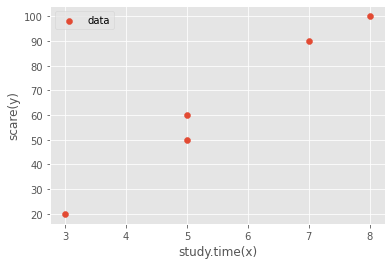

In [6]:
#x값에 따른 y값

plt.scatter(x,y, label='data') # y좌표 평면에 점 찍기
plt.legend()
plt.xlabel('study.time(x)') # x축 이름
plt.ylabel('scare(y)') # y축 이름

### **| step 1. 모델 구현**

$model(x;w) = wx$
x는 함수의 인풋
;세미콜론뒤에 있는 값은 : 함수 안에 있는 파라미터

* 모델 정의

In [8]:
def model(x,w=1):
 return x*w

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20||
|5|50||
|5|60||
|7|90||
|8|100||

In [12]:
print(x)
model(x)

[3 5 5 7 8]


array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [12]:
def loss(y, y_hat):
  return np.sum(np.abs(y-y_hat))  / len(y)

y_hat=model(x)
error = loss(y,y_hat)
print(f'x:{x}')
print(f'x:{y}')
print(f'y hat:{y_hat}')
print(f'error:{error}')

NameError: ignored

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


* w=1 일때 error=58.4
* w=2 일때 error=52.8
* w=3 일때 error=47.2
* w=4 일때 error=41.6
* w=5 일때 error=36.0
* w=6 일때 error=30.4
* w=7 일때 error=25.2
* w=8 일때 error=20.8
* w=9 일때 error=16.4
* w=10 일때 error=12.0
* w=11 일때 error=9.6
* w=12 일때 error=7.2
* w=13 일때 error=8.8
* w=14 일때 error=14.4
* w=15 일때 error=20.0
* w=16 일때 error=25.6
* w=17 일때 error=31.2
* w=18 일때 error=36.8
* w=19 일때 error=42.4
* w=20 일때 error=48.0


Text(0, 0.5, '(error)')

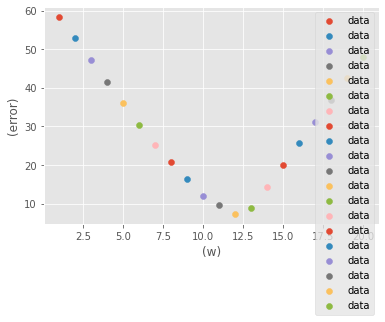

In [24]:
for w in range(1,21):
  y_pred = model(x, w=w)
  error = loss(y,y_pred)
  print(f'* w={w} 일때 error={error}')

  #가중치 w에 대한 오차 error의 시각화


  plt.scatter(w,error, label='data') # y좌표 평면에 점 찍기
plt.legend()
plt.xlabel('(w)') # x축 이름
plt.ylabel('(error)') # y축 이름

### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [26]:
w_ = 12
y_pred = model(x, w=w_)
error = loss(y,y_pred)
print(error)

7.2


* 학습 완료된 모델에 대한 예측 시각화

Text(0, 0.5, 'scare(y)')

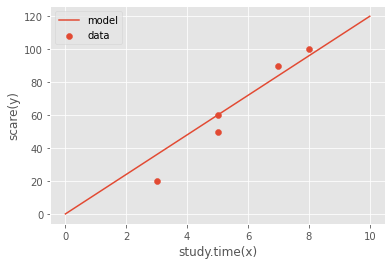

In [33]:
test_x =np.linspace(0,10,50)
#print(test_x)
test_y_pred = model(test_x, w=w_)
#print(test_y_pred)


plt.scatter(x,y, label='data') # y좌표 평면에 점 찍기
plt.plot(test_x, test_y_pred,label ='model')  #모델의 직선을 그리기
plt.legend()
plt.xlabel('study.time(x)') # x축 이름
plt.ylabel('scare(y)') # y축 이름

* 공부시간이 6시간일 때 예상 점수는?


In [34]:
model(6, w=w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [35]:
x_test =np.array([1,2,5,6,7])
y_test =np.array([5,15,55,80,85])

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [37]:
loss(y_test,model(x_test,w=w_))

6.0

* 학습 완료된 모델에 테스트 데이터 예측 시각화

Text(0, 0.5, 'scare(y)')

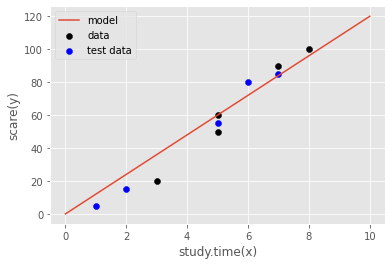

In [40]:
#데이터
plt.scatter(x,y, label='data', c='k') # y좌표 평면에 점 찍기
#모델
plt.plot(test_x, test_y_pred,label ='model')  #모델의 직선을 그리기
#테스트 데이터
plt.scatter(x_test, y_test,label ='test data', c='b')

plt.legend()

plt.xlabel('study.time(x)') # x축 이름

plt.ylabel('scare(y)') # y축 이름

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [3]:
x=np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)

y=np.array([20,80,60,90,100])
print(x, x.shape)
print(y, y.shape)

[[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]] (5, 2)
[ 20  80  60  90 100] (5,)


* 데이터 시각화

Text(0.5, 0, 'score')

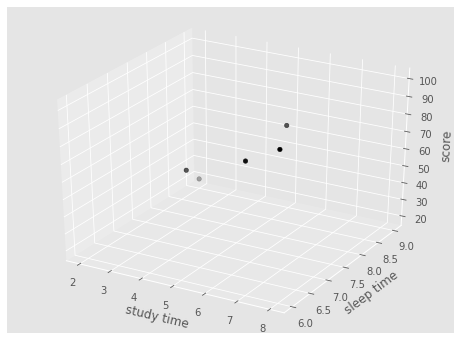

In [4]:
fig = plt.figure(figsize=(8,6)) #그림 전체 사이즈 설정
ax = plt.axes(projection='3d') # 좌표를 3d로 설정
#공부시간(x_*1). 수면시간(x_*2). 성정(y)
study_time= x[:,0]
sleep_time= x[:,1]
ax.scatter3D(study_time,sleep_time,y, c='k', label='data')
ax.set_xlabel('study time')
ax.set_ylabel('sleep time')
ax.set_zlabel('score')

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [5]:
def model2(x_vec,w_vec=np.array([1,1])):
  return np.dot(x_vec, w_vec)
x_vec =np.array([5,10])
model2(x_vec)


15

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

In [6]:
print(x)
model2(x)

[[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]]


array([11, 14, 11, 13, 14])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [13]:
y_pred =model2(x)
print(y_pred)
loss(y,y_pred)

[11 14 11 13 14]


57.4

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [8]:
w1_range=np.arange(31)
w2_range=np.arange(-10, 11)
print(w1_range)
print(w2_range)
#(w1,w2) 순서쌍을 구해볼게
W1,W2 = np.meshgrid(w1_range, w2_range)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


In [14]:
errors=[]
for w1,w2 in zip(W1.flatten(),W2.flatten()):
  y_pred = model2(x,w_vec=np.array([w1,w2]))
  error =loss(y,y_pred)
  print(f'w1={w1}',f'w2={w2} 일때 예측값은 {y_pred}이고, 오차는 {error}')
  errors.append(error)
print(errors)

w1=0 w2=-10 일때 예측값은 [-90 -80 -70 -60 -60]이고, 오차는 142.0
w1=1 w2=-10 일때 예측값은 [-88 -74 -66 -53 -52]이고, 오차는 136.6
w1=2 w2=-10 일때 예측값은 [-86 -68 -62 -46 -44]이고, 오차는 131.2
w1=3 w2=-10 일때 예측값은 [-84 -62 -58 -39 -36]이고, 오차는 125.8
w1=4 w2=-10 일때 예측값은 [-82 -56 -54 -32 -28]이고, 오차는 120.4
w1=5 w2=-10 일때 예측값은 [-80 -50 -50 -25 -20]이고, 오차는 115.0
w1=6 w2=-10 일때 예측값은 [-78 -44 -46 -18 -12]이고, 오차는 109.6
w1=7 w2=-10 일때 예측값은 [-76 -38 -42 -11  -4]이고, 오차는 104.2
w1=8 w2=-10 일때 예측값은 [-74 -32 -38  -4   4]이고, 오차는 98.8
w1=9 w2=-10 일때 예측값은 [-72 -26 -34   3  12]이고, 오차는 93.4
w1=10 w2=-10 일때 예측값은 [-70 -20 -30  10  20]이고, 오차는 88.0
w1=11 w2=-10 일때 예측값은 [-68 -14 -26  17  28]이고, 오차는 82.6
w1=12 w2=-10 일때 예측값은 [-66  -8 -22  24  36]이고, 오차는 77.2
w1=13 w2=-10 일때 예측값은 [-64  -2 -18  31  44]이고, 오차는 71.8
w1=14 w2=-10 일때 예측값은 [-62   4 -14  38  52]이고, 오차는 66.4
w1=15 w2=-10 일때 예측값은 [-60  10 -10  45  60]이고, 오차는 61.0
w1=16 w2=-10 일때 예측값은 [-58  16  -6  52  68]이고, 오차는 55.6
w1=17 w2=-10 일때 예측값은 [-56  22  -2  59  76]이고, 오차는 50.2
w1=18 w2=-10

* 3d플롯으로 시각화

In [15]:
 W1.shape, W2.shape, np.array(errors).shape , 21*31

((21, 31), (21, 31), (651,), 651)

No handles with labels found to put in legend.


Text(0.5, 0, 'error')

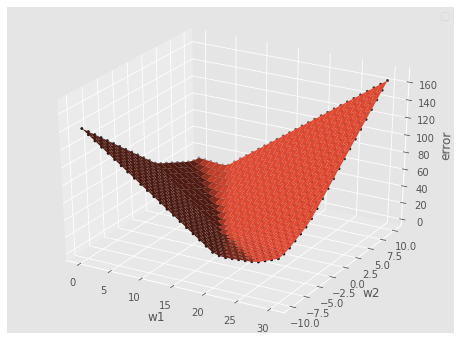

In [16]:
fig = plt.figure(figsize=(8,6)) #그림 전체 사이즈 설정
ax = plt.axes(projection='3d') # 좌표를 3d로 설정
#w1,w2에 대한 error
ax.scatter3D(W1.flatten(), W2.flatten(), errors, marker='.', c='k')
surf = ax.plot_surface( W1, W2, np.array(errors).reshape(21,31) ) #행렬

plt.legend()
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error')

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [19]:
w_vec_ = np.array ([14,-1]) 
y_pred=model2(x, w_vec=w_vec_)
print(y)
print(y_pred)

[ 20  80  60  90 100]
[ 19  76  49  92 106]


* 학습 완료된 모델의 최종 손실 계산

In [20]:
loss(y,y_pred)

4.8

* 학습 완료된 모델에 대한 예측 시각화

Text(0.5, 0, 'score')

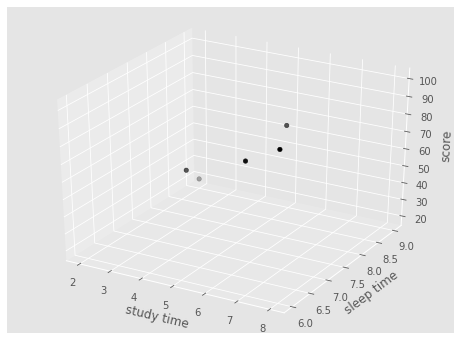

In [22]:
fig = plt.figure(figsize=(8,6)) #그림 전체 사이즈 설정
ax = plt.axes(projection='3d') # 좌표를 3d로 설정
#공부시간(x_*1). 수면시간(x_*2). 성정(y)
study_time= x[:,0]
sleep_time= x[:,1]
ax.scatter3D(study_time,sleep_time,y, c='k', label='data')

#모델
study_time_range = np.linspace(2,8,100)
sleep_time_range = np.linspace(6,9,100)
STUDY,SLEEP =np.meshgrid(study_time_range,sleep_time_range)
ax.plot_surface(STUDY, SLEEP, model2())

ax.set_xlabel('study time')
ax.set_ylabel('sleep time')
ax.set_zlabel('score')

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [24]:


model2(np.array([6, 5]), w_vec_)

79

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [37]:
x_test=np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
y_test=np.array([15,25,60,90,95])
x_test.shape, y_test.shape

((5, 2), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [39]:
y_test_pred = model2(x_test, w_vec_)
error = loss(y_test, y_test_pred)
print(error)

16.8


* 학습 완료된 모델에 테스트 데이터 예측 시각화

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [84]:
class Model():
  def __init__(self):
    self.w=5
  def model(self,x):
   return x*self.w

  def predict(self, x):
    y_pred=self.model(x)
    return y_pred

  def loss(self, y,y_hat):
    return np.sum( np.abs(y-y_hat)) /len(y) #각 샘플의 오차 평균

  def validation(self, y, y_hat):
    y_pred = self.model(x)
    error = self.loss(y, y_pred)
    return error
       
  def plot(self,x,y):

     plt.scatter(x,y, label='data') # y좌표 평면에 점 찍기
     plt.plot(x, self.predict(x),label ='model')  #모델의 직선을 그리기
     plt.legend()
     plt.xlabel('study.time(x)') # x축 이름
     plt.ylabel('scare(y)') # y축 이름    
     plt.title(f'w: {self.w}')
     plt.show()

  def fit(self,x,y,w_min,w_max):
    min_error = 100000000
    for w in range(1,21):
      self.w=w
      y_pred = self.model(x)
      error = self.loss(y,y_pred)
      
      
            #지금 구한 오차가 전에 구한 오차 중 가장 작으면
      if min_error >= error:
        min_error = error #최소오차 업데이트

        w_ideal=w# 업데이트 하겠다
        print(f'* w={w} 일때 error={error}')

      else: #지금 구한 오차가 커지기 시작하면
        print('학습 종료')
        self.w=w_ideal
        break
      

In [85]:
x=np.array([3,5,5,7,8])
y=np.array([20,50,60,90,100])
x.shape, y.shape

((5,), (5,))

모델의 예측 [15 25 25 35 40]
평가 결과(오차) 22.4


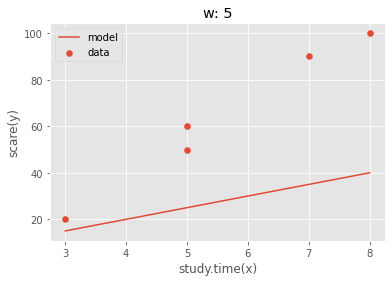

* w=1 일때 error=58.4
* w=2 일때 error=52.8
* w=3 일때 error=47.2
* w=4 일때 error=41.6
* w=5 일때 error=36.0
* w=6 일때 error=30.4
* w=7 일때 error=25.2
* w=8 일때 error=20.8
* w=9 일때 error=16.4
* w=10 일때 error=12.0
* w=11 일때 error=9.6
* w=12 일때 error=7.2
학습 종료


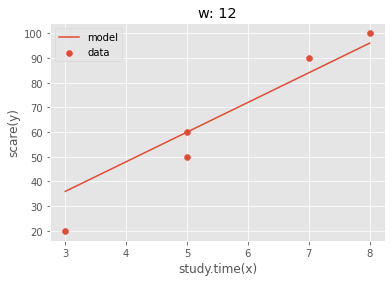

In [86]:
model =Model()
model.predict(10)

print('모델의 예측', model.predict(x))
print('평가 결과(오차)', model.validation(x,y))
model.plot(x,y)
model.fit(x, y, w_min = 5, w_max=20)
model.plot(x,y)

In [87]:
model.w

12